# Importing Backages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading & Exploring data

In [2]:
df = pd.read_csv("housing.csv.zip")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
20635,False
20636,False
20637,False
20638,False


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# Fixing total_bedrooms Feature

In [8]:
df['total_bedrooms']

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [9]:
df['total_bedrooms'].value_counts()

,count
total_bedrooms,
280.0,55
331.0,51
345.0,50
343.0,49
393.0,49
...,...
2009.0,1
2249.0,1
3114.0,1


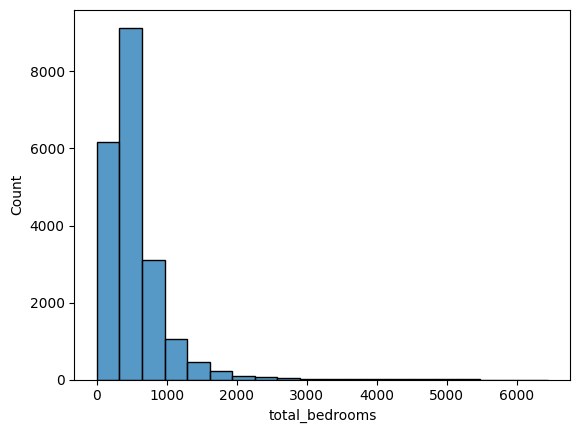

In [10]:
sns.histplot(data=df, x='total_bedrooms', bins=20)
plt.show()

In [11]:
df['total_bedrooms'].isna().sum()/df['total_bedrooms'].sum()*100

np.float64(0.0018834775255181634)

the nan values equal to 0.001 % of the data so i will drop nans

In [12]:
df = df.dropna(subset=['total_bedrooms'])

In [13]:
df['total_bedrooms'].isna().sum()

np.int64(0)

# Detecting Outliers

In [14]:
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)


Q1:
 longitude               -121.8000
latitude                  33.9300
housing_median_age        18.0000
total_rooms             1450.0000
total_bedrooms           296.0000
population               787.0000
households               280.0000
median_income              2.5637
median_house_value    119500.0000
Name: 0.25, dtype: float64

Q3:
 longitude               -118.010
latitude                  37.720
housing_median_age        37.000
total_rooms             3143.000
total_bedrooms           647.000
population              1722.000
households               604.000
median_income              4.744
median_house_value    264700.000
Name: 0.75, dtype: float64

IQR:
 longitude                  3.7900
latitude                   3.7900
housing_median_age        19.0000
total_rooms             1693.0000
total_bedrooms           351.0000
population               935.0000
households               324.0000
median_income              2.1803
median_house_value    145200.0000
dtype: float64


In [15]:
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
print("\nNumber of outliers per column:\n", outliers.sum())



Number of outliers per column:
 longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value    1064
dtype: int64


# Exploring & Handling Outliers for each column

# total_bedrooms column

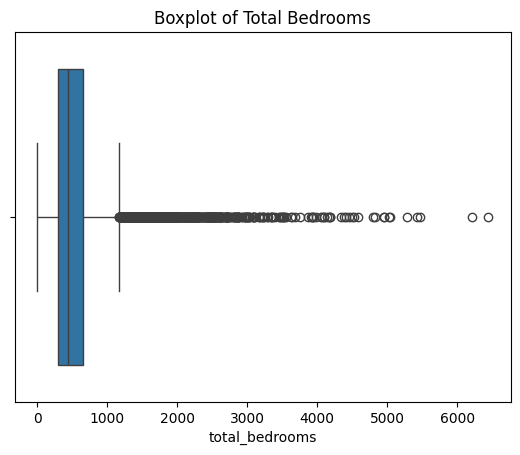

In [16]:
sns.boxplot(x=df['total_bedrooms'])
plt.title("Boxplot of Total Bedrooms")
plt.show()

In [17]:
Q1 = df['total_bedrooms'].quantile(0.25)
Q3 = df['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['total_bedrooms'] >= lower_bound) &
 (df['total_bedrooms'] <= upper_bound)]


In [18]:
df['total_bedrooms'] = df['total_bedrooms'].clip(lower=lower_bound,
                                                 upper=upper_bound)


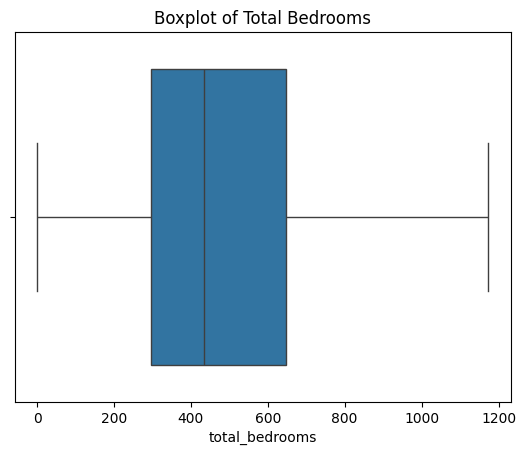

In [19]:
sns.boxplot(x=df['total_bedrooms'])
plt.title("Boxplot of Total Bedrooms")
plt.show()

# total_rooms column

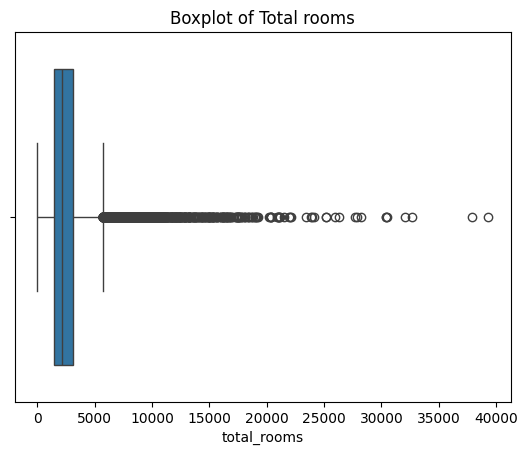

In [20]:
sns.boxplot(x=df['total_rooms'])
plt.title("Boxplot of Total rooms")
plt.show()

In [21]:
Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['total_rooms'] >= lower_bound) &
 (df['total_rooms'] <= upper_bound)]

In [22]:
df['total_rooms'] = df['total_rooms'].clip(lower=lower_bound,
                                                 upper=upper_bound)

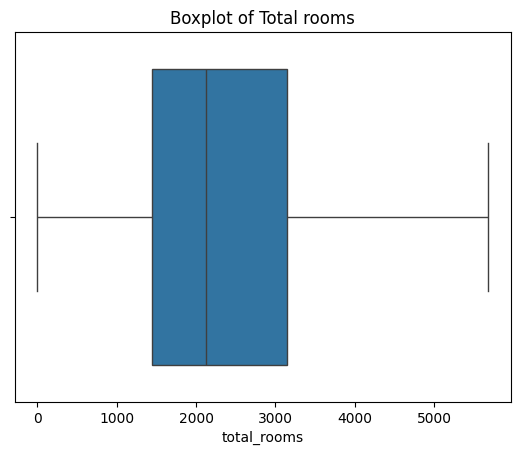

In [23]:
sns.boxplot(x=df['total_rooms'])
plt.title("Boxplot of Total rooms")
plt.show()

# population column

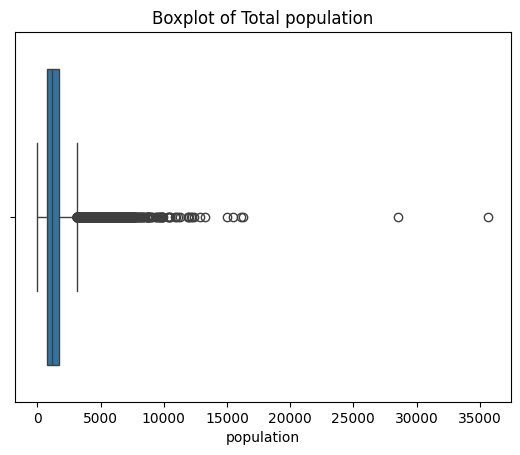

In [24]:
sns.boxplot(x=df['population'])
plt.title("Boxplot of Total population")
plt.show()

In [25]:
Q1 = df['population'].quantile(0.25)
Q3 = df['population'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['population'] >= lower_bound) &
 (df['population'] <= upper_bound)]

In [26]:
df['population'] = df['population'].clip(lower=lower_bound,
                                                 upper=upper_bound)

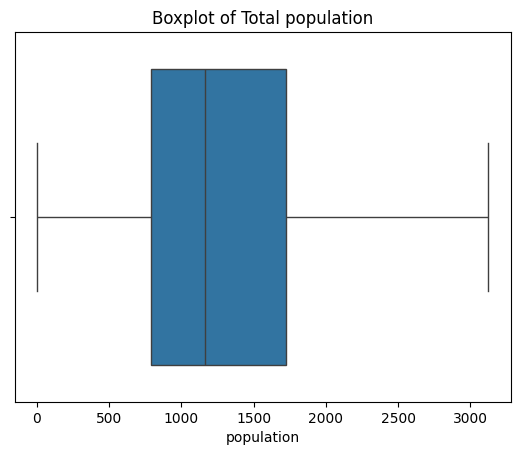

In [27]:
sns.boxplot(x=df['population'])
plt.title("Boxplot of Total population")
plt.show()

# households column

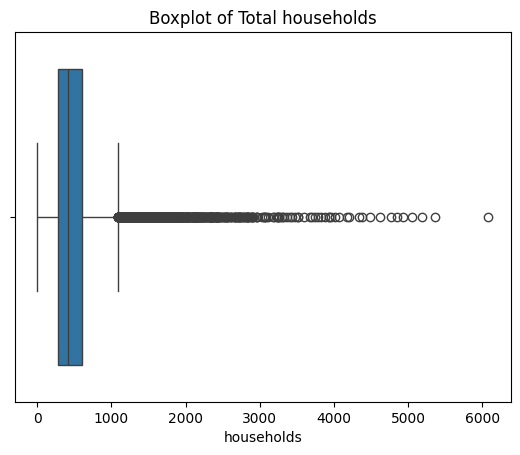

In [28]:
sns.boxplot(x=df['households'])
plt.title("Boxplot of Total households")
plt.show()

In [29]:
Q1 = df['households'].quantile(0.25)
Q3 = df['households'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['households'] >= lower_bound) &
 (df['households'] <= upper_bound)]

In [30]:
df['households'] = df['households'].clip(lower=lower_bound,
                                                 upper=upper_bound)

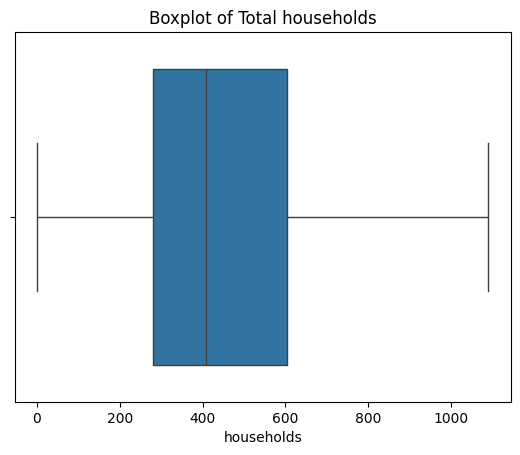

In [31]:
sns.boxplot(x=df['households'])
plt.title("Boxplot of Total households")
plt.show()

# median_income column

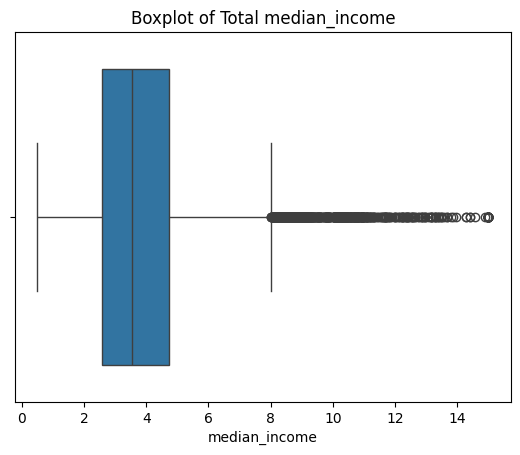

In [32]:
sns.boxplot(x=df['median_income'])
plt.title("Boxplot of Total median_income")
plt.show()

In [33]:
Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['median_income'] >= lower_bound) &
 (df['median_income'] <= upper_bound)]

In [34]:
df['median_income'] = df['median_income'].clip(lower=lower_bound,
                                                 upper=upper_bound)

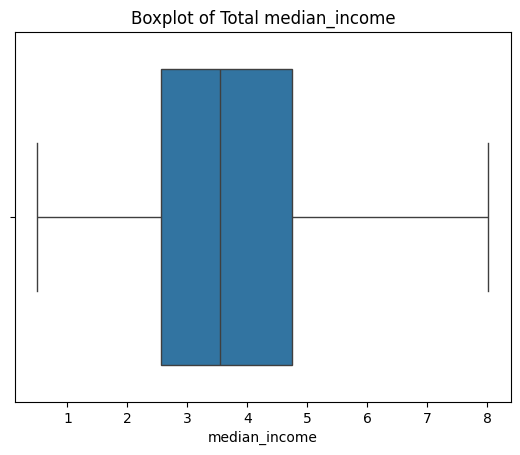

In [35]:
sns.boxplot(x=df['median_income'])
plt.title("Boxplot of Total median_income")
plt.show()

# median_house_value column

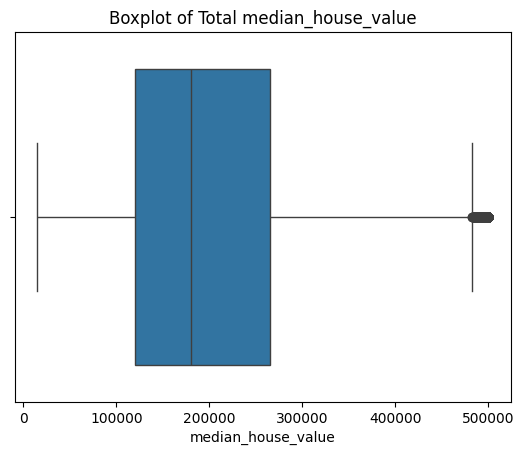

In [36]:
sns.boxplot(x=df['median_house_value'])
plt.title("Boxplot of Total median_house_value")
plt.show()

In [37]:
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['median_house_value'] >= lower_bound) &
 (df['median_house_value'] <= upper_bound)]

In [38]:
df['median_house_value'] = df['median_house_value'].clip(lower=lower_bound,
                                                 upper=upper_bound)

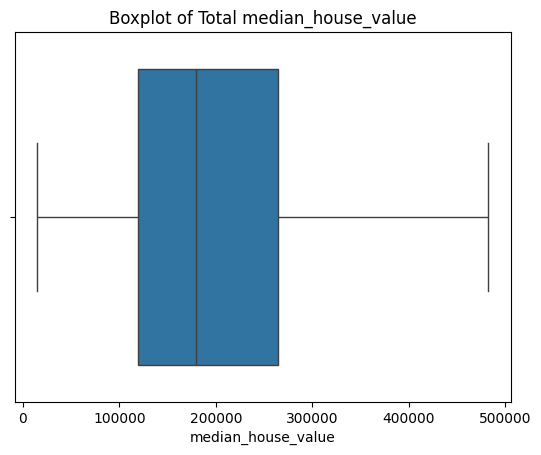

In [39]:
sns.boxplot(x=df['median_house_value'])
plt.title("Boxplot of Total median_house_value")
plt.show()

# Visualizing some data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

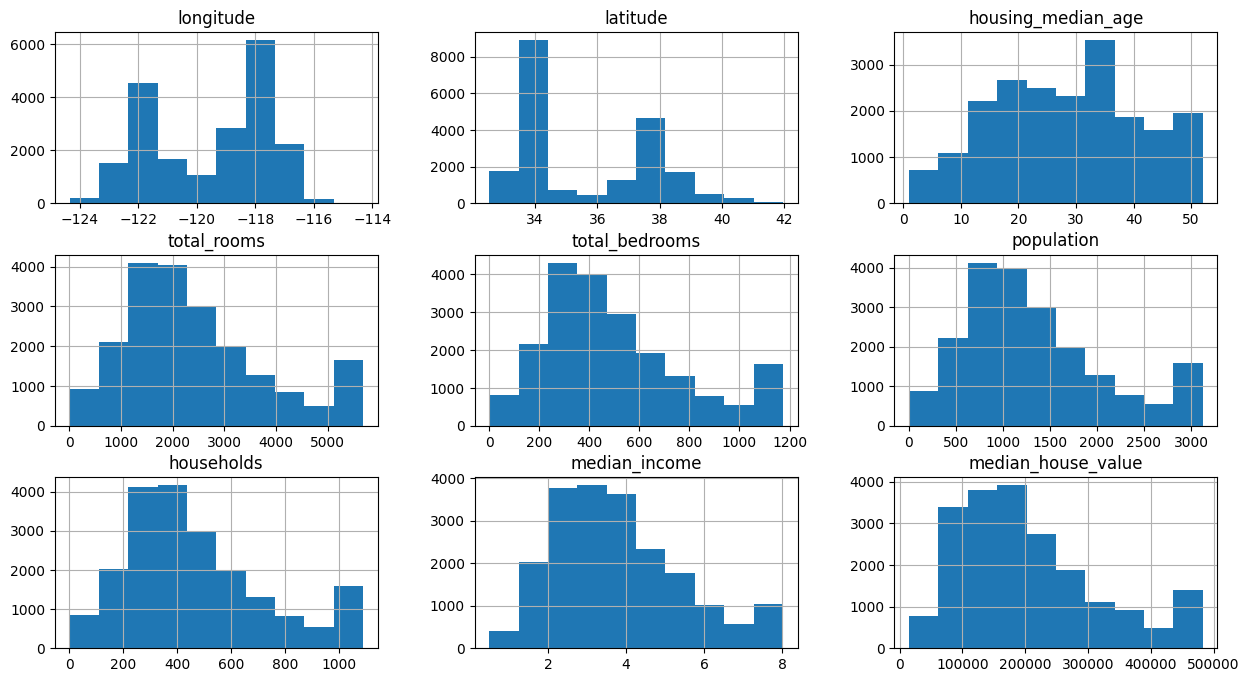

In [40]:
df.hist(figsize=(15,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

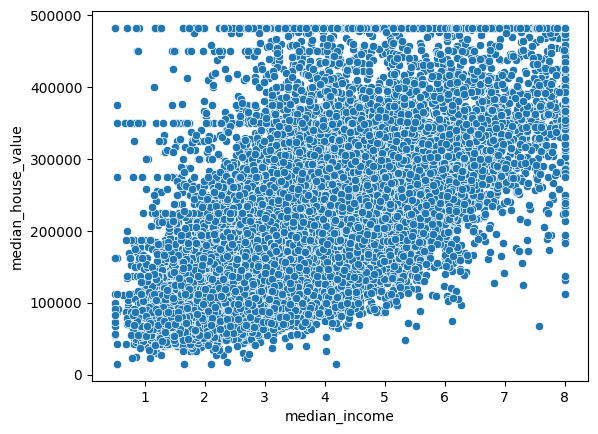

In [41]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)

<Axes: xlabel='longitude', ylabel='latitude'>

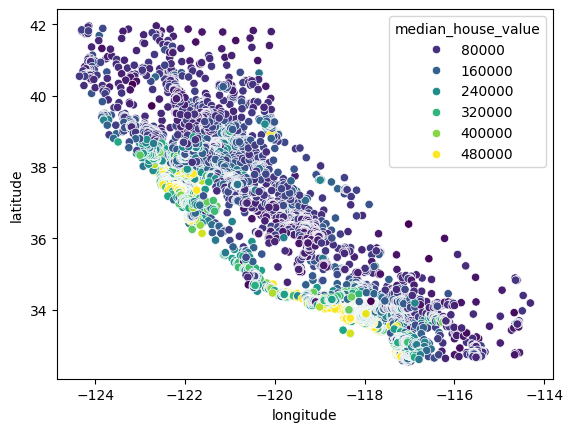

In [42]:
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df, palette='viridis')


# preparing the data for the model

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])


In [44]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
0,9034
1,6496
4,2628
3,2270
2,5


In [46]:
from sklearn.model_selection import train_test_split

X= df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
Predictions= reg.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse/1000)

RMSE: 67.70237273469546
